In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Amos_1", "'words', 'amos', ',', 'among', 'herdsmen', 'tekoa', ',', 'saw', 'concerning', 'israel', 'days', 'uzziah', 'king', 'judah', ',', 'days', 'jeroboam', 'son', 'joash', 'king', 'israel', ',', 'two', 'years', 'earthquake.and', 'said', ',', 'lord', 'roar', 'zion', ',', 'utter', 'voice', 'jerusalem', ';', 'habitations', 'shepherds', 'shall', 'mourn', ',', 'top', 'carmel', 'shall', 'wither.thus', 'said', 'lord', ';', 'three', 'transgressions', 'damascus', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'threshed', 'gilead', 'threshing', 'instruments', 'iron', ':', 'send', 'fire', 'house', 'hazael', ',', 'shall', 'devour', 'palaces', 'benhadad.i', 'break', 'also', 'bar', 'damascus', ',', 'cut', 'inhabitant', 'plain', 'aven', ',', 'holds', 'scepter', 'house', 'eden', ':', 'people', 'syria', 'shall', 'go', 'captivity', 'kir', ',', 'said', 'lord.thus', 'said', 'lord', ';', 'three', 'transgressions', 'gaza', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'carried', 'away', 'captive', 'whole', 'captivity', ',', 'deliver', 'edom', ':', 'send', 'fire', 'wall', 'gaza', ',', 'shall', 'devour', 'palaces', 'thereof', ':', 'cut', 'inhabitant', 'ashdod', ',', 'holds', 'scepter', 'ashkelon', ',', 'turn', 'hand', 'ekron', ':', 'remnant', 'philistines', 'shall', 'perish', ',', 'said', 'lord', 'god.thus', 'said', 'lord', ';', 'three', 'transgressions', 'tyrus', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'delivered', 'whole', 'captivity', 'edom', ',', 'remembered', 'brotherly', 'covenant', ':', 'send', 'fire', 'wall', 'tyrus', ',', 'shall', 'devour', 'palaces', 'thereof.thus', 'said', 'lord', ';', 'three', 'transgressions', 'edom', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'pursue', 'brother', 'sword', ',', 'cast', 'pity', ',', 'anger', 'tear', 'perpetually', ',', 'kept', 'wrath', 'ever', ':', 'send', 'fire', 'teman', ',', 'shall', 'devour', 'palaces', 'bozrah.thus', 'said', 'lord', ';', 'three', 'transgressions', 'children', 'ammon', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'ripped', 'women', 'child', 'gilead', ',', 'might', 'enlarge', 'border', ':', 'kindle', 'fire', 'wall', 'rabbah', ',', 'shall', 'devour', 'palaces', 'thereof', ',', 'shouting', 'day', 'battle', ',', 'tempest', 'day', 'whirlwind', ':', 'king', 'shall', 'go', 'captivity', ',', 'princes', 'together', ',', 'said', 'lord', '.'"],
               ["Amos_2", "'thus', 'said', 'lord', ';', 'three', 'transgressions', 'moab', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'burned', 'bones', 'king', 'edom', 'lime', ':', 'send', 'fire', 'moab', ',', 'shall', 'devour', 'palaces', 'kirioth', ':', 'moab', 'shall', 'die', 'tumult', ',', 'shouting', ',', 'sound', 'trumpet', ':', 'cut', 'judge', 'middle', 'thereof', ',', 'slay', 'princes', 'thereof', ',', 'said', 'lord.thus', 'said', 'lord', ';', 'three', 'transgressions', 'judah', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'despised', 'law', 'lord', ',', 'kept', 'commandments', ',', 'lies', 'caused', 'err', ',', 'fathers', 'walked', ':', 'send', 'fire', 'judah', ',', 'shall', 'devour', 'palaces', 'jerusalem.thus', 'said', 'lord', ';', 'three', 'transgressions', 'israel', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'sold', 'righteous', 'silver', ',', 'poor', 'pair', 'shoes', ';', 'pant', 'dust', 'earth', 'head', 'poor', ',', 'turn', 'aside', 'way', 'meek', ':', 'man', 'father', 'go', 'maid', ',', 'profane', 'holy', 'name', ':', 'lay', 'clothes', 'laid', 'pledge', 'every', 'altar', ',', 'drink', 'wine', 'condemned', 'house', 'god.yet', 'destroyed', 'amorite', ',', 'whose', 'height', 'like', 'height', 'cedars', ',', 'strong', 'oaks', ';', 'yet', 'destroyed', 'fruit', ',', 'roots', 'beneath.also', 'brought', 'land', 'egypt', ',', 'led', 'forty', 'years', 'wilderness', ',', 'possess', 'land', 'amorite.and', 'raised', 'sons', 'prophets', ',', 'young', 'men', 'nazarites', '.', 'even', 'thus', ',', 'children', 'israel', '?', 'said', 'lord.but', 'gave', 'nazarites', 'wine', 'drink', ';', 'commanded', 'prophets', ',', 'saying', ',', 'prophesy', 'not.behold', ',', 'pressed', ',', 'cart', 'pressed', 'full', 'sheaves.therefore', 'flight', 'shall', 'perish', 'swift', ',', 'strong', 'shall', 'strengthen', 'force', ',', 'neither', 'shall', 'mighty', 'deliver', ':', 'neither', 'shall', 'stand', 'handles', 'bow', ';', 'swift', 'foot', 'shall', 'deliver', ':', 'neither', 'shall', 'rides', 'horse', 'deliver', 'himself.and', 'courageous', 'among', 'mighty', 'shall', 'flee', 'away', 'naked', 'day', ',', 'said', 'lord', '.'"],
               ["Amos_3", "'hear', 'word', 'lord', 'spoken', ',', 'children', 'israel', ',', 'whole', 'family', 'brought', 'land', 'egypt', ',', 'saying', ',', 'known', 'families', 'earth', ':', 'therefore', 'punish', 'iniquities.can', 'two', 'walk', 'together', ',', 'except', 'agreed', '?', 'lion', 'roar', 'forest', ',', 'prey', '?', 'young', 'lion', 'cry', 'den', ',', 'taken', 'nothing', '?', 'bird', 'fall', 'snare', 'earth', ',', 'gin', '?', 'shall', 'one', 'take', 'snare', 'earth', ',', 'taken', 'nothing', '?', 'shall', 'trumpet', 'blown', 'city', ',', 'people', 'afraid', '?', 'shall', 'evil', 'city', ',', 'lord', 'done', '?', 'surely', 'lord', 'god', 'nothing', ',', 'reveals', 'secret', 'servants', 'prophets.the', 'lion', 'roared', ',', 'fear', '?', 'lord', 'god', 'spoken', ',', 'prophesy', '?', 'publish', 'palaces', 'ashdod', ',', 'palaces', 'land', 'egypt', ',', 'say', ',', 'assemble', 'mountains', 'samaria', ',', 'behold', 'great', 'tumults', 'middle', 'thereof', ',', 'oppressed', 'middle', 'thereof.for', 'know', 'right', ',', 'said', 'lord', ',', 'store', 'violence', 'robbery', 'palaces.therefore', 'thus', 'said', 'lord', 'god', ';', 'adversary', 'shall', 'even', 'round', 'land', ';', 'shall', 'bring', 'strength', ',', 'palaces', 'shall', 'spoiled.thus', 'said', 'lord', ';', 'shepherd', 'takes', 'mouth', 'lion', 'two', 'legs', ',', 'piece', 'ear', ';', 'shall', 'children', 'israel', 'taken', 'dwell', 'samaria', 'corner', 'bed', ',', 'damascus', 'couch.hear', ',', 'testify', 'house', 'jacob', ',', 'said', 'lord', 'god', ',', 'god', 'hosts', ',', 'day', 'shall', 'visit', 'transgressions', 'israel', 'also', 'visit', 'altars', 'bethel', ':', 'horns', 'altar', 'shall', 'cut', ',', 'fall', 'ground.and', 'smite', 'winter', 'house', 'summer', 'house', ';', 'houses', 'ivory', 'shall', 'perish', ',', 'great', 'houses', 'shall', 'end', ',', 'said', 'lord', '.'"],
               ["Amos_4", "'hear', 'word', ',', 'cows', 'bashan', ',', 'mountain', 'samaria', ',', 'oppress', 'poor', ',', 'crush', 'needy', ',', 'say', 'masters', ',', 'bring', ',', 'let', 'us', 'drink.the', 'lord', 'god', 'sworn', 'holiness', ',', ',', 'see', ',', 'days', 'shall', 'come', ',', 'take', 'away', 'hooks', ',', 'posterity', 'fishhooks.and', 'shall', 'go', 'breaches', ',', 'every', 'cow', ';', 'shall', 'cast', 'palace', ',', 'said', 'lord.come', 'bethel', ',', 'transgress', ';', 'gilgal', 'multiply', 'transgression', ';', 'bring', 'sacrifices', 'every', 'morning', ',', 'tithes', 'three', 'years', ':', 'offer', 'sacrifice', 'thanksgiving', 'leaven', ',', 'proclaim', 'publish', 'free', 'offerings', ':', 'likes', ',', 'children', 'israel', ',', 'said', 'lord', 'god.and', 'also', 'given', 'cleanness', 'teeth', 'cities', ',', 'want', 'bread', 'places', ':', 'yet', 'returned', ',', 'said', 'lord.and', 'also', 'withheld', 'rain', ',', 'yet', 'three', 'months', 'harvest', ':', 'caused', 'rain', 'one', 'city', ',', 'caused', 'rain', 'another', 'city', ':', 'one', 'piece', 'rained', ',', 'piece', 'whereupon', 'rained', 'withered.so', 'two', 'three', 'cities', 'wandered', 'one', 'city', ',', 'drink', 'water', ';', 'satisfied', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'smitten', 'blasting', 'mildew', ':', 'gardens', 'vineyards', 'fig', 'trees', 'olive', 'trees', 'increased', ',', 'palmerworm', 'devoured', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'sent', 'among', 'pestilence', 'manner', 'egypt', ':', 'young', 'men', 'slain', 'sword', ',', 'taken', 'away', 'horses', ';', 'made', 'stink', 'camps', 'come', 'nostrils', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'overthrown', ',', 'god', 'overthrew', 'sodom', 'gomorrah', ',', 'firebrand', 'plucked', 'burning', ':', 'yet', 'returned', ',', 'said', 'lord.therefore', 'thus', ',', 'israel', ':', ',', 'prepare', 'meet', 'god', ',', 'israel.for', ',', 'see', ',', 'forms', 'mountains', ',', 'creates', 'wind', ',', 'declares', 'man', 'thought', ',', 'makes', 'morning', 'darkness', ',', 'treads', 'high', 'places', 'earth', ',', 'lord', ',', 'god', 'hosts', ',', 'name', '.'"],
               ["Amos_5", "'hear', 'word', 'take', ',', 'even', 'lamentation', ',', 'house', 'israel.the', 'virgin', 'israel', 'fallen', ';', 'shall', 'rise', ':', 'forsaken', 'land', ';', 'none', 'raise', 'up.for', 'thus', 'said', 'lord', 'god', ';', 'city', 'went', 'thousand', 'shall', 'leave', 'hundred', ',', 'went', 'forth', 'hundred', 'shall', 'leave', 'ten', ',', 'house', 'israel.for', 'thus', 'said', 'lord', 'house', 'israel', ',', 'seek', ',', 'shall', 'live', ':', 'seek', 'bethel', ',', 'enter', 'gilgal', ',', 'pass', 'beersheba', ':', 'gilgal', 'shall', 'surely', 'go', 'captivity', ',', 'bethel', 'shall', 'come', 'nothing.seek', 'lord', ',', 'shall', 'live', ';', 'lest', 'break', 'like', 'fire', 'house', 'joseph', ',', 'devour', ',', 'none', 'quench', 'bethel.you', 'turn', 'judgment', 'wormwood', ',', 'leave', 'righteousness', 'earth', ',', 'seek', 'makes', 'seven', 'stars', 'orion', ',', 'turns', 'shadow', 'death', 'morning', ',', 'makes', 'day', 'dark', 'night', ':', 'calls', 'waters', 'sea', ',', 'pours', 'face', 'earth', ':', 'lord', 'name', ':', 'strengthens', 'spoiled', 'strong', ',', 'spoiled', 'shall', 'come', 'fortress.they', 'hate', 'rebukes', 'gate', ',', 'abhor', 'speaks', 'uprightly.for', 'much', 'therefore', 'treading', 'poor', ',', 'take', 'burdens', 'wheat', ':', 'built', 'houses', 'hewn', 'stone', ',', 'shall', 'dwell', ';', 'planted', 'pleasant', 'vineyards', ',', 'shall', 'drink', 'wine', 'them.for', 'know', 'manifold', 'transgressions', 'mighty', 'sins', ':', 'afflict', ',', 'take', 'bribe', ',', 'turn', 'aside', 'poor', 'gate', 'right.therefore', 'prudent', 'shall', 'keep', 'silence', 'time', ';', 'evil', 'time.seek', 'good', ',', 'evil', ',', 'may', 'live', ':', 'lord', ',', 'god', 'hosts', ',', 'shall', ',', 'spoken.hate', 'evil', ',', 'love', 'good', ',', 'establish', 'judgment', 'gate', ':', 'may', 'lord', 'god', 'hosts', 'gracious', 'remnant', 'joseph.therefore', 'lord', ',', 'god', 'hosts', ',', 'lord', ',', 'said', 'thus', ';', 'wailing', 'shall', 'streets', ';', 'shall', 'say', 'highways', ',', 'alas', '!', 'alas', '!', 'shall', 'call', 'farmer', 'mourning', ',', 'skillful', 'lamentation', 'wailing.and', 'vineyards', 'shall', 'wailing', ':', 'pass', ',', 'said', 'lord.woe', 'desire', 'day', 'lord', '!', 'end', '?', 'day', 'lord', 'darkness', ',', 'light.as', 'man', 'flee', 'lion', ',', 'bear', 'met', ';', 'went', 'house', ',', 'leaned', 'hand', 'wall', ',', 'serpent', 'bit', 'him.shall', 'day', 'lord', 'darkness', ',', 'light', '?', 'even', 'dark', ',', 'brightness', '?', 'hate', ',', 'despise', 'feast', 'days', ',', 'smell', 'solemn', 'assemblies.though', 'offer', 'burnt', 'offerings', 'meat', 'offerings', ',', 'accept', ':', 'neither', 'regard', 'peace', 'offerings', 'fat', 'beasts.take', 'away', 'noise', 'songs', ';', 'hear', 'melody', 'viols.but', 'let', 'judgment', 'run', 'waters', ',', 'righteousness', 'mighty', 'stream.have', 'offered', 'sacrifices', 'offerings', 'wilderness', 'forty', 'years', ',', 'house', 'israel', '?', 'borne', 'tabernacle', 'moloch', 'chiun', 'images', ',', 'star', 'god', ',', 'made', 'yourselves.therefore', 'cause', 'go', 'captivity', 'beyond', 'damascus', ',', 'said', 'lord', ',', 'whose', 'name', 'god', 'hosts', '.'"],
               ["Amos_6", "'woe', 'ease', 'zion', ',', 'trust', 'mountain', 'samaria', ',', 'named', 'chief', 'nations', ',', 'house', 'israel', 'came', '!', 'pass', 'calneh', ',', 'see', ';', 'go', 'hamath', 'great', ':', 'go', 'gath', 'philistines', ':', 'better', 'kingdoms', '?', 'border', 'greater', 'border', '?', 'put', 'far', 'away', 'evil', 'day', ',', 'cause', 'seat', 'violence', 'come', 'near', ';', 'lie', 'beds', 'ivory', ',', 'stretch', 'couches', ',', 'eat', 'lambs', 'flock', ',', 'calves', 'middle', 'stall', ';', 'chant', 'sound', 'viol', ',', 'invent', 'instruments', 'music', ',', 'like', 'david', ';', 'drink', 'wine', 'bowls', ',', 'anoint', 'chief', 'ointments', ':', 'grieved', 'affliction', 'joseph.therefore', 'shall', 'go', 'captive', 'first', 'go', 'captive', ',', 'banquet', 'stretched', 'shall', 'removed.the', 'lord', 'god', 'sworn', ',', 'said', 'lord', 'god', 'hosts', ',', 'abhor', 'excellency', 'jacob', ',', 'hate', 'palaces', ':', 'therefore', 'deliver', 'city', 'therein.and', 'shall', 'come', 'pass', ',', 'remain', 'ten', 'men', 'one', 'house', ',', 'shall', 'die.and', 'man', ', 'uncle', 'shall', 'take', ',', 'burns', ',', 'bring', 'bones', 'house', ',', 'shall', 'say', 'sides', 'house', ',', 'yet', '?', 'shall', 'say', ',', '.', 'shall', 'say', ',', 'hold', 'tongue', ':', 'may', 'make', 'mention', 'name', 'lord.for', ',', 'behold', ',', 'lord', 'commands', ',', 'smite', 'great', 'house', 'breaches', ',', 'little', 'house', 'clefts.shall', 'horses', 'run', 'rock', '?', 'one', 'plow', 'oxen', '?', 'turned', 'judgment', 'gall', ',', 'fruit', 'righteousness', 'hemlock', ':', 'rejoice', 'thing', 'nothing', ',', 'say', ',', 'taken', 'us', 'horns', 'strength', '?', ',', 'behold', ',', 'raise', 'nation', ',', 'house', 'israel', ',', 'said', 'lord', 'god', 'hosts', ';', 'shall', 'afflict', 'entering', 'hemath', 'river', 'wilderness', '.'"],
               ["Amos_7", "'thus', 'lord', 'god', 'showed', ';', ',', 'behold', ',', 'formed', 'grasshoppers', 'beginning', 'shooting', 'latter', 'growth', ';', ',', 'see', ',', 'latter', 'growth', 'king', ', 'mowings.and', 'came', 'pass', ',', 'made', 'end', 'eating', 'grass', 'land', ',', 'said', ',', 'lord', 'god', ',', 'forgive', ',', 'beseech', ':', 'shall', 'jacob', 'arise', '?', 'small.the', 'lord', 'repented', ':', 'shall', ',', 'said', 'lord.thus', 'lord', 'god', 'showed', ':', ',', 'behold', ',', 'lord', 'god', 'called', 'contend', 'fire', ',', 'devoured', 'great', 'deep', ',', 'eat', 'part.then', 'said', ',', 'lord', 'god', ',', 'cease', ',', 'beseech', ':', 'shall', 'jacob', 'arise', '?', 'small.the', 'lord', 'repented', ':', 'also', 'shall', ',', 'said', 'lord', 'god.thus', 'showed', ':', ',', 'behold', ',', 'lord', 'stood', 'wall', 'made', 'plumb', 'line', ',', 'plumb', 'line', 'hand.and', 'lord', 'said', ',', 'amos', ',', 'see', '?', 'said', ',', 'plumb', 'line', '.', 'said', 'lord', ',', 'behold', ',', 'set', 'plumb', 'line', 'middle', 'people', 'israel', ':', 'pass', ':', 'high', 'places', 'isaac', 'shall', 'desolate', ',', 'sanctuaries', 'israel', 'shall', 'laid', 'waste', ';', 'rise', 'house', 'jeroboam', 'sword.then', 'amaziah', 'priest', 'bethel', 'sent', 'jeroboam', 'king', 'israel', ',', 'saying', ',', 'amos', 'conspired', 'middle', 'house', 'israel', ':', 'land', 'able', 'bear', 'words.for', 'thus', 'amos', 'said', ',', 'jeroboam', 'shall', 'die', 'sword', ',', 'israel', 'shall', 'surely', 'led', 'away', 'captive', 'land.also', 'amaziah', 'said', 'amos', ',', 'seer', ',', 'go', ',', 'flee', 'away', 'land', 'judah', ',', 'eat', 'bread', ',', 'prophesy', ':', 'prophesy', 'bethel', ':', 'king', ', 'chapel', ',', 'king', ', 'court.then', 'answered', 'amos', ',', 'said', 'amaziah', ',', 'prophet', ',', 'neither', 'prophet', ', 'son', ';', 'herdsman', ',', 'gatherer', 'sycomore', 'fruit', ':', 'lord', 'took', 'followed', 'flock', ',', 'lord', 'said', ',', 'go', ',', 'prophesy', 'people', 'israel.now', 'therefore', 'hear', 'word', 'lord', ':', 'say', ',', 'prophesy', 'israel', ',', 'drop', 'word', 'house', 'isaac.therefore', 'thus', 'said', 'lord', ';', 'wife', 'shall', 'harlot', 'city', ',', 'sons', 'daughters', 'shall', 'fall', 'sword', ',', 'land', 'shall', 'divided', 'line', ';', 'shall', 'die', 'polluted', 'land', ':', 'israel', 'shall', 'surely', 'go', 'captivity', 'forth', 'land', '.'"],
               ["Amos_8", "'thus', 'lord', 'god', 'showed', ':', 'behold', 'basket', 'summer', 'fruit.and', 'said', ',', 'amos', ',', 'see', '?', 'said', ',', 'basket', 'summer', 'fruit', '.', 'said', 'lord', ',', 'end', 'come', 'people', 'israel', ';', 'pass', 'more.and', 'songs', 'temple', 'shall', 'howlings', 'day', ',', 'said', 'lord', 'god', ':', 'shall', 'many', 'dead', 'bodies', 'every', 'place', ';', 'shall', 'cast', 'forth', 'silence.hear', ',', 'swallow', 'needy', ',', 'even', 'make', 'poor', 'land', 'fail', ',', 'saying', ',', 'new', 'moon', 'gone', ',', 'may', 'sell', 'corn', '?', 'sabbath', ',', 'may', 'set', 'forth', 'wheat', ',', 'making', 'ephah', 'small', ',', 'shekel', 'great', ',', 'falsifying', 'balances', 'deceit', '?', 'may', 'buy', 'poor', 'silver', ',', 'needy', 'pair', 'shoes', ';', 'yes', ',', 'sell', 'refuse', 'wheat', '?', 'lord', 'sworn', 'excellency', 'jacob', ',', 'surely', 'never', 'forget', 'works.shall', 'land', 'tremble', ',', 'every', 'one', 'mourn', 'dwells', 'therein', '?', 'shall', 'rise', 'wholly', 'flood', ';', 'shall', 'cast', 'drowned', ',', 'flood', 'egypt.and', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', 'god', ',', 'cause', 'sun', 'go', 'noon', ',', 'darken', 'earth', 'clear', 'day', ':', 'turn', 'feasts', 'mourning', ',', 'songs', 'lamentation', ';', 'bring', 'sackcloth', 'loins', ',', 'baldness', 'every', 'head', ';', 'make', 'mourning', 'son', ',', 'end', 'thereof', 'bitter', 'day.behold', ',', 'days', 'come', ',', 'said', 'lord', 'god', ',', 'send', 'famine', 'land', ',', 'famine', 'bread', ',', 'thirst', 'water', ',', 'hearing', 'words', 'lord', ':', 'shall', 'wander', 'sea', 'sea', ',', 'north', 'even', 'east', ',', 'shall', 'run', 'fro', 'seek', 'word', 'lord', ',', 'shall', 'find', 'it.in', 'day', 'shall', 'fair', 'virgins', 'young', 'men', 'faint', 'thirst.they', 'swear', 'sin', 'samaria', ',', 'say', ',', 'god', ',', 'dan', ',', 'lives', ';', ',', 'manner', 'beersheba', 'lives', ';', 'even', 'shall', 'fall', ',', 'never', 'rise', '.'"],
               ["Amos_9", "'saw', 'lord', 'standing', 'altar', ':', 'said', ',', 'smite', 'lintel', 'door', ',', 'posts', 'may', 'shake', ':', 'cut', 'head', ',', ';', 'slay', 'last', 'sword', ':', 'flees', 'shall', 'flee', 'away', ',', 'escapes', 'shall', 'delivered.though', 'dig', 'hell', ',', 'shall', 'hand', 'take', ';', 'though', 'climb', 'heaven', ',', 'bring', ':', 'though', 'hide', 'top', 'carmel', ',', 'search', 'take', ';', 'though', 'hid', 'sight', 'bottom', 'sea', ',', 'command', 'serpent', ',', 'shall', 'bite', ':', 'though', 'go', 'captivity', 'enemies', ',', 'command', 'sword', ',', 'shall', 'slay', ':', 'set', 'eyes', 'evil', ',', 'good.and', 'lord', 'god', 'hosts', 'touches', 'land', ',', 'shall', 'melt', ',', 'dwell', 'therein', 'shall', 'mourn', ':', 'shall', 'rise', 'wholly', 'like', 'flood', ';', 'shall', 'drowned', ',', 'flood', 'egypt.it', 'builds', 'stories', 'heaven', ',', 'founded', 'troop', 'earth', ';', 'calls', 'waters', 'sea', ',', 'pours', 'face', 'earth', ':', 'lord', 'name.are', 'children', 'ethiopians', ',', 'children', 'israel', '?', 'said', 'lord', '.', 'brought', 'israel', 'land', 'egypt', '?', 'philistines', 'caphtor', ',', 'syrians', 'kir', '?', 'behold', ',', 'eyes', 'lord', 'god', 'sinful', 'kingdom', ',', 'destroy', 'face', 'earth', ';', 'saving', 'utterly', 'destroy', 'house', 'jacob', ',', 'said', 'lord.for', ',', 'see', ',', 'command', ',', 'sift', 'house', 'israel', 'among', 'nations', ',', 'like', 'corn', 'sifted', 'sieve', ',', 'yet', 'shall', 'least', 'grain', 'fall', 'earth.all', 'sinners', 'people', 'shall', 'die', 'sword', ',', 'say', ',', 'evil', 'shall', 'overtake', 'prevent', 'us.in', 'day', 'raise', 'tabernacle', 'david', 'fallen', ',', 'close', 'breaches', 'thereof', ';', 'raise', 'ruins', ',', 'build', 'days', 'old', ':', 'may', 'possess', 'remnant', 'edom', ',', 'heathen', ',', 'called', 'name', ',', 'said', 'lord', 'this.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'plowman', 'shall', 'overtake', 'reaper', ',', 'treader', 'grapes', 'sows', 'seed', ';', 'mountains', 'shall', 'drop', 'sweet', 'wine', ',', 'hills', 'shall', 'melt.and', 'bring', 'captivity', 'people', 'israel', ',', 'shall', 'build', 'waste', 'cities', ',', 'inhabit', ';', 'shall', 'plant', 'vineyards', ',', 'drink', 'wine', 'thereof', ';', 'shall', 'also', 'make', 'gardens', ',', 'eat', 'fruit', 'them.and', 'plant', 'land', ',', 'shall', 'pulled', 'land', 'given', ',', 'said', 'lord', 'god', '.'"],
               ["Miqueias_1", "'word', 'lord', 'came', 'micah', 'morasthite', 'days', 'jotham', ',', 'ahaz', ',', 'hezekiah', ',', 'kings', 'judah', ',', 'saw', 'concerning', 'samaria', 'jerusalem.hear', ',', 'people', ';', 'listen', ',', 'earth', ',', 'therein', ':', 'let', 'lord', 'god', 'witness', ',', 'lord', 'holy', 'temple.for', ',', 'behold', ',', 'lord', 'comes', 'forth', 'place', ',', 'come', ',', 'tread', 'high', 'places', 'earth.and', 'mountains', 'shall', 'molten', ',', 'valleys', 'shall', 'cleft', ',', 'wax', 'fire', ',', 'waters', 'poured', 'steep', 'place.for', 'transgression', 'jacob', ',', 'sins', 'house', 'israel', '.', 'transgression', 'jacob', '?', 'samaria', '?', 'high', 'places', 'judah', '?', 'jerusalem', '?', 'therefore', 'make', 'samaria', 'heap', 'field', ',', 'plantings', 'vineyard', ':', 'pour', 'stones', 'thereof', 'valley', ',', 'discover', 'foundations', 'thereof.and', 'graven', 'images', 'thereof', 'shall', 'beaten', 'pieces', ',', 'hires', 'thereof', 'shall', 'burned', 'fire', ',', 'idols', 'thereof', 'lay', 'desolate', ':', 'gathered', 'hire', 'harlot', ',', 'shall', 'return', 'hire', 'harlot.therefore', 'wail', 'howl', ',', 'go', 'stripped', 'naked', ':', 'make', 'wailing', 'like', 'dragons', ',', 'mourning', 'owls.for', 'wound', 'incurable', ';', 'come', 'judah', ';', 'come', 'gate', 'people', ',', 'even', 'jerusalem.declare', 'gath', ',', 'weep', ':', 'house', 'aphrah', 'roll', 'dust.pass', 'away', ',', 'inhabitant', 'saphir', ',', 'shame', 'naked', ':', 'inhabitant', 'zaanan', 'came', 'forth', 'mourning', 'bethezel', ';', 'shall', 'receive', 'standing.for', 'inhabitant', 'maroth', 'waited', 'carefully', 'good', ':', 'evil', 'came', 'lord', 'gate', 'jerusalem.o', 'inhabitant', 'lachish', ',', 'bind', 'chariot', 'swift', 'beast', ':', 'beginning', 'sin', 'daughter', 'zion', ':', 'transgressions', 'israel', 'found', 'you.therefore', 'shall', 'give', 'presents', 'moreshethgath', ':', 'houses', 'achzib', 'shall', 'lie', 'kings', 'israel.yet', 'bring', 'heir', ',', 'inhabitant', 'mareshah', ':', 'shall', 'come', 'adullam', 'glory', 'israel.make', 'bald', ',', 'poll', 'delicate', 'children', ';', 'enlarge', 'baldness', 'eagle', ';', 'gone', 'captivity', '.'"],
               ["Miqueias_2", "'woe', 'devise', 'iniquity', ',', 'work', 'evil', 'beds', '!', 'morning', 'light', ',', 'practice', ',', 'power', 'hand.and', 'covet', 'fields', ',', 'take', 'violence', ';', 'houses', ',', 'take', 'away', ':', 'oppress', 'man', 'house', ',', 'even', 'man', 'heritage.therefore', 'thus', 'said', 'lord', ';', 'behold', ',', 'family', 'devise', 'evil', ',', 'shall', 'remove', 'necks', ';', 'neither', 'shall', 'go', 'haughtily', ':', 'time', 'evil.in', 'day', 'shall', 'one', 'take', 'parable', ',', 'lament', 'doleful', 'lamentation', ',', 'say', ',', 'utterly', 'spoiled', ':', 'changed', 'portion', 'people', ':', 'removed', '!', 'turning', 'away', 'divided', 'fields.therefore', 'shall', 'none', 'shall', 'cast', 'cord', 'lot', 'congregation', 'lord.prophesy', ',', 'say', 'prophesy', ':', 'shall', 'prophesy', ',', 'shall', 'take', 'shame.o', 'named', 'house', 'jacob', ',', 'spirit', 'lord', 'straitened', '?', 'doings', '?', 'words', 'good', 'walks', 'uprightly', '?', 'even', 'late', 'people', 'risen', 'enemy', ':', 'pull', 'robe', 'garment', 'pass', 'securely', 'men', 'averse', 'war.the', 'women', 'people', 'cast', 'pleasant', 'houses', ';', 'children', 'taken', 'away', 'glory', 'ever.arise', ',', 'depart', ';', 'rest', ':', 'polluted', ',', 'shall', 'destroy', ',', 'even', 'sore', 'destruction.if', 'man', 'walking', 'spirit', 'falsehood', 'lie', ',', 'saying', ',', 'prophesy', 'wine', 'strong', 'drink', ';', 'shall', 'even', 'prophet', 'people.i', 'surely', 'assemble', ',', 'jacob', ',', ';', 'surely', 'gather', 'remnant', 'israel', ';', 'put', 'together', 'sheep', 'bozrah', ',', 'flock', 'middle', 'fold', ':', 'shall', 'make', 'great', 'noise', 'reason', 'multitude', 'men.the', 'breaker', 'come', ':', 'broken', ',', 'passed', 'gate', ',', 'gone', ':', 'king', 'shall', 'pass', ',', 'lord', 'head', '.'"],
               ["Miqueias_3", "'said', ',', 'hear', ',', 'pray', ',', 'heads', 'jacob', ',', 'princes', 'house', 'israel', ';', 'know', 'judgment', '?', 'hate', 'good', ',', 'love', 'evil', ';', 'pluck', 'skin', ',', 'flesh', 'bones', ';', 'also', 'eat', 'flesh', 'people', ',', 'flay', 'skin', ';', 'break', 'bones', ',', 'chop', 'pieces', ',', 'pot', ',', 'flesh', 'within', 'caldron.then', 'shall', 'cry', 'lord', ',', 'hear', ':', 'even', 'hide', 'face', 'time', ',', 'behaved', 'ill', 'doings.thus', 'said', 'lord', 'concerning', 'prophets', 'make', 'people', 'err', ',', 'bite', 'teeth', ',', 'cry', ',', 'peace', ';', 'puts', 'mouths', ',', 'even', 'prepare', 'war', 'him.therefore', 'night', 'shall', ',', 'shall', 'vision', ';', 'shall', 'dark', ',', 'shall', 'divine', ';', 'sun', 'shall', 'go', 'prophets', ',', 'day', 'shall', 'dark', 'them.then', 'shall', 'seers', 'ashamed', ',', 'diviners', 'confounded', ':', 'yes', ',', 'shall', 'cover', 'lips', ';', 'answer', 'god.but', 'truly', 'full', 'power', 'spirit', 'lord', ',', 'judgment', ',', 'might', ',', 'declare', 'jacob', 'transgression', ',', 'israel', 'sin.hear', ',', 'pray', ',', 'heads', 'house', 'jacob', ',', 'princes', 'house', 'israel', ',', 'abhor', 'judgment', ',', 'pervert', 'equity.they', 'build', 'zion', 'blood', ',', 'jerusalem', 'iniquity.the', 'heads', 'thereof', 'judge', 'reward', ',', 'priests', 'thereof', 'teach', 'hire', ',', 'prophets', 'thereof', 'divine', 'money', ':', 'yet', 'lean', 'lord', ',', 'say', ',', 'lord', 'among', 'us', '?', 'none', 'evil', 'come', 'us.therefore', 'shall', 'zion', 'sake', 'plowed', 'field', ',', 'jerusalem', 'shall', 'become', 'heaps', ',', 'mountain', 'house', 'high', 'places', 'forest', '.'"],
               ["Miqueias_4", "'last', 'days', 'shall', 'come', 'pass', ',', 'mountain', 'house', 'lord', 'shall', 'established', 'top', 'mountains', ',', 'shall', 'exalted', 'hills', ';', 'people', 'shall', 'flow', 'it.and', 'many', 'nations', 'shall', 'come', ',', 'say', ',', 'come', ',', 'let', 'us', 'go', 'mountain', 'lord', ',', 'house', 'god', 'jacob', ';', 'teach', 'us', 'ways', ',', 'walk', 'paths', ':', 'law', 'shall', 'go', 'forth', 'zion', ',', 'word', 'lord', 'jerusalem.and', 'shall', 'judge', 'among', 'many', 'people', ',', 'rebuke', 'strong', 'nations', 'afar', ';', 'shall', 'beat', 'swords', 'plowshares', ',', 'spears', 'pruning', 'hooks', ':', 'nation', 'shall', 'lift', 'sword', 'nation', ',', 'neither', 'shall', 'learn', 'war', 'more.but', 'shall', 'sit', 'every', 'man', 'vine', 'fig', 'tree', ';', 'none', 'shall', 'make', 'afraid', ':', 'mouth', 'lord', 'hosts', 'spoken', 'it.for', 'people', 'walk', 'every', 'one', 'name', 'god', ',', 'walk', 'name', 'lord', 'god', 'ever', 'ever.in', 'day', ',', 'said', 'lord', ',', 'assemble', 'halts', ',', 'gather', 'driven', ',', 'afflicted', ';', 'make', 'halted', 'remnant', ',', 'cast', 'far', 'strong', 'nation', ':', 'lord', 'shall', 'reign', 'mount', 'zion', ',', 'even', 'ever.and', ',', 'tower', 'flock', ',', 'strong', 'hold', 'daughter', 'zion', ',', 'shall', 'come', ',', 'even', 'first', 'dominion', ';', 'kingdom', 'shall', 'come', 'daughter', 'jerusalem.now', 'cry', 'aloud', '?', 'king', '?', 'counselor', 'perished', '?', 'pangs', 'taken', 'woman', 'travail.be', 'pain', ',', 'labor', 'bring', 'forth', ',', 'daughter', 'zion', ',', 'like', 'woman', 'travail', ':', 'shall', 'go', 'forth', 'city', ',', 'shall', 'dwell', 'field', ',', 'shall', 'go', 'even', 'babylon', ';', 'shall', 'delivered', ';', 'lord', 'shall', 'redeem', 'hand', 'enemies.now', 'also', 'many', 'nations', 'gathered', ',', 'say', ',', 'let', 'defiled', ',', 'let', 'eye', 'look', 'zion.but', 'know', 'thoughts', 'lord', ',', 'neither', 'understand', 'counsel', ':', 'shall', 'gather', 'sheaves', 'floor.arise', 'thresh', ',', 'daughter', 'zion', ':', 'make', 'horn', 'iron', ',', 'make', 'hoofs', 'brass', ':', 'shall', 'beat', 'pieces', 'many', 'people', ':', 'consecrate', 'gain', 'lord', ',', 'substance', 'lord', 'whole', 'earth', '.'"],
               ["Miqueias_5", "'gather', 'troops', ',', 'daughter', 'troops', ':', 'laid', 'siege', 'us', ':', 'shall', 'smite', 'judge', 'israel', 'rod', 'cheek.but', ',', 'bethlehem', 'ephratah', ',', 'though', 'little', 'among', 'thousands', 'judah', ',', 'yet', 'shall', 'come', 'forth', 'ruler', 'israel', ';', 'whose', 'goings', 'forth', 'old', ',', 'everlasting.therefore', 'give', ',', 'time', 'travails', 'brought', 'forth', ':', 'remnant', 'brothers', 'shall', 'return', 'children', 'israel.and', 'shall', 'stand', 'feed', 'strength', 'lord', ',', 'majesty', 'name', 'lord', 'god', ';', 'shall', 'abide', ':', 'shall', 'great', 'ends', 'earth.and', 'man', 'shall', 'peace', ',', 'assyrian', 'shall', 'come', 'land', ':', 'shall', 'tread', 'palaces', ',', 'shall', 'raise', 'seven', 'shepherds', ',', 'eight', 'principal', 'men.and', 'shall', 'waste', 'land', 'assyria', 'sword', ',', 'land', 'nimrod', 'entrances', 'thereof', ':', 'thus', 'shall', 'deliver', 'us', 'assyrian', ',', 'comes', 'land', ',', 'treads', 'within', 'borders.and', 'remnant', 'jacob', 'shall', 'middle', 'many', 'people', 'dew', 'lord', ',', 'showers', 'grass', ',', 'tarries', 'man', ',', 'waits', 'sons', 'men.and', 'remnant', 'jacob', 'shall', 'among', 'gentiles', 'middle', 'many', 'people', 'lion', 'among', 'beasts', 'forest', ',', 'young', 'lion', 'among', 'flocks', 'sheep', ':', ',', 'go', ',', 'treads', ',', 'tears', 'pieces', ',', 'none', 'deliver.your', 'hand', 'shall', 'lifted', 'adversaries', ',', 'enemies', 'shall', 'cut', 'off.and', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', ',', 'cut', 'horses', 'middle', ',', 'destroy', 'chariots', ':', 'cut', 'cities', 'land', ',', 'throw', 'strong', 'holds', ':', 'cut', 'witchcrafts', 'hand', ';', 'shall', 'soothsayers', ':', 'graven', 'images', 'also', 'cut', ',', 'standing', 'images', 'middle', ';', 'shall', 'worship', 'work', 'hands.and', 'pluck', 'groves', 'middle', ':', 'destroy', 'cities.and', 'execute', 'vengeance', 'anger', 'fury', 'heathen', ',', 'heard', '.'"],
               ["Miqueias_6", "'hear', 'lord', 'said', ';', 'arise', ',', 'contend', 'mountains', ',', 'let', 'hills', 'hear', 'voice.hear', ',', 'mountains', ',', 'lord', ', 'controversy', ',', 'strong', 'foundations', 'earth', ':', 'lord', 'controversy', 'people', ',', 'plead', 'israel.o', 'people', ',', 'done', '?', 'wherein', 'wearied', '?', 'testify', 'me.for', 'brought', 'land', 'egypt', ',', 'redeemed', 'house', 'servants', ';', 'sent', 'moses', ',', 'aaron', ',', 'miriam.o', 'people', ',', 'remember', 'balak', 'king', 'moab', 'consulted', ',', 'balaam', 'son', 'beor', 'answered', 'shittim', 'gilgal', ';', 'may', 'know', 'righteousness', 'lord.with', 'shall', 'come', 'lord', ',', 'bow', 'high', 'god', '?', 'shall', 'come', 'burnt', 'offerings', ',', 'calves', 'year', 'old', '?', 'lord', 'pleased', 'thousands', 'rams', ',', 'ten', 'thousands', 'rivers', 'oil', '?', 'shall', 'give', 'firstborn', 'transgression', ',', 'fruit', 'body', 'sin', 'soul', '?', 'showed', ',', 'man', ',', 'good', ';', 'lord', 'require', ',', 'justly', ',', 'love', 'mercy', ',', 'walk', 'humbly', 'god', '?', 'lord', ', 'voice', 'cries', 'city', ',', 'man', 'wisdom', 'shall', 'see', 'name', ':', 'hear', 'rod', ',', 'appointed', 'it.are', 'yet', 'treasures', 'wickedness', 'house', 'wicked', ',', 'scant', 'measure', 'abominable', '?', 'shall', 'count', 'pure', 'wicked', 'balances', ',', 'bag', 'deceitful', 'weights', '?', 'rich', 'men', 'thereof', 'full', 'violence', ',', 'inhabitants', 'thereof', 'spoken', 'lies', ',', 'tongue', 'deceitful', 'mouth.therefore', 'also', 'make', 'sick', 'smiting', ',', 'making', 'desolate', 'sins.you', 'shall', 'eat', ',', 'satisfied', ';', 'casting', 'shall', 'middle', ';', 'shall', 'take', 'hold', ',', 'shall', 'deliver', ';', 'deliver', 'give', 'sword.you', 'shall', 'sow', ',', 'shall', 'reap', ';', 'shall', 'tread', 'olives', ',', 'shall', 'anoint', 'oil', ';', 'sweet', 'wine', ',', 'shall', 'drink', 'wine.for', 'statutes', 'omri', 'kept', ',', 'works', 'house', 'ahab', ',', 'walk', 'counsels', ';', 'make', 'desolation', ',', 'inhabitants', 'thereof', 'hissing', ':', 'therefore', 'shall', 'bear', 'reproach', 'people', '.'"],
               ["Miqueias_7", "'woe', '!', 'gathered', 'summer', 'fruits', ',', 'grape', 'gleanings', 'vintage', ':', 'cluster', 'eat', ':', 'soul', 'desired', 'first', 'ripe', 'fruit.the', 'good', 'man', 'perished', 'earth', ':', 'none', 'upright', 'among', 'men', ':', 'lie', 'wait', 'blood', ';', 'hunt', 'every', 'man', 'brother', 'net.that', 'may', 'evil', 'hands', 'earnestly', ',', 'prince', 'asks', ',', 'judge', 'asks', 'reward', ';', 'great', 'man', ',', 'utters', 'mischievous', 'desire', ':', 'wrap', 'up.the', 'best', 'brier', ':', 'upright', 'sharper', 'thorn', 'hedge', ':', 'day', 'watchmen', 'visitation', 'comes', ';', 'shall', 'perplexity.trust', 'friend', ',', 'put', 'confidence', 'guide', ':', 'keep', 'doors', 'mouth', 'lies', 'bosom.for', 'son', 'dishonors', 'father', ',', 'daughter', 'rises', 'mother', ',', 'daughter', 'law', 'mother', 'law', ';', 'man', ', 'enemies', 'men', 'house.therefore', 'look', 'lord', ';', 'wait', 'god', 'salvation', ':', 'god', 'hear', 'me.rejoice', ',', 'enemy', ':', 'fall', ',', 'shall', 'arise', ';', 'sit', 'darkness', ',', 'lord', 'shall', 'light', 'me.i', 'bear', 'indignation', 'lord', ',', 'sinned', ',', 'plead', 'cause', ',', 'execute', 'judgment', ':', 'bring', 'forth', 'light', ',', 'shall', 'behold', 'righteousness.then', 'enemy', 'shall', 'see', ',', 'shame', 'shall', 'cover', 'said', ',', 'lord', 'god', '?', 'eyes', 'shall', 'behold', ':', 'shall', 'trodden', 'mire', 'streets.in', 'day', 'walls', 'built', ',', 'day', 'shall', 'decree', 'far', 'removed.in', 'day', 'also', 'shall', 'come', 'even', 'assyria', ',', 'fortified', 'cities', ',', 'fortress', 'even', 'river', ',', 'sea', 'sea', ',', 'mountain', 'mountain.notwithstanding', 'land', 'shall', 'desolate', 'dwell', 'therein', ',', 'fruit', 'doings.feed', 'people', 'rod', ',', 'flock', 'heritage', ',', 'dwell', 'solitarily', 'wood', ',', 'middle', 'carmel', ':', 'let', 'feed', 'bashan', 'gilead', ',', 'days', 'old.according', 'days', 'coming', 'land', 'egypt', 'show', 'marvelous', 'things.the', 'nations', 'shall', 'see', 'confounded', 'might', ':', 'shall', 'lay', 'hand', 'mouth', ',', 'ears', 'shall', 'deaf.they', 'shall', 'lick', 'dust', 'like', 'serpent', ',', 'shall', 'move', 'holes', 'like', 'worms', 'earth', ':', 'shall', 'afraid', 'lord', 'god', ',', 'shall', 'fear', 'you.who', 'god', 'like', ',', 'pardons', 'iniquity', ',', 'passes', 'transgression', 'remnant', 'heritage', '?', 'retains', 'anger', 'ever', ',', 'delights', 'mercy.he', 'turn', ',', 'compassion', 'us', ';', 'subdue', 'iniquities', ';', 'cast', 'sins', 'depths', 'sea.you', 'perform', 'truth', 'jacob', ',', 'mercy', 'abraham', ',', 'sworn', 'fathers', 'days', 'old', '.'"]])

In [7]:
df = pd.DataFrame(data, index=range(100,116),columns=['Autor', 'Livro'])

In [8]:
print(df)

          Autor                                              Livro
100      Amos_1  'words', 'amos', ',', 'among', 'herdsmen', 'te...
101      Amos_2  'thus', 'said', 'lord', ';', 'three', 'transgr...
102      Amos_3  'hear', 'word', 'lord', 'spoken', ',', 'childr...
103      Amos_4  'hear', 'word', ',', 'cows', 'bashan', ',', 'm...
104      Amos_5  'hear', 'word', 'take', ',', 'even', 'lamentat...
105      Amos_6  'woe', 'ease', 'zion', ',', 'trust', 'mountain...
106      Amos_7  'thus', 'lord', 'god', 'showed', ';', ',', 'be...
107      Amos_8  'thus', 'lord', 'god', 'showed', ':', 'behold'...
108      Amos_9  'saw', 'lord', 'standing', 'altar', ':', 'said...
109  Miqueias_1  'word', 'lord', 'came', 'micah', 'morasthite',...
110  Miqueias_2  'woe', 'devise', 'iniquity', ',', 'work', 'evi...
111  Miqueias_3  'said', ',', 'hear', ',', 'pray', ',', 'heads'...
112  Miqueias_4  'last', 'days', 'shall', 'come', 'pass', ',', ...
113  Miqueias_5  'gather', 'troops', ',', 'daughter', 'troops'

In [9]:
corpus = df['Livro'].tolist()

In [10]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

16 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
away punishment thereof,0.246548,0.175225,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
four turn away,0.246548,0.175225,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
lord three transgressions,0.246548,0.175225,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
said lord three,0.246548,0.175225,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
shall devour palaces,0.246548,0.116816,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
turn away punishment,0.246548,0.175225,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
devour palaces thereof,0.169862,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
thus said lord,0.158118,0.112376,0.08531,0.0,0.063383,0.0,0.035639,0.0,0.0,0.0,0.043194,0.043571,0.0,0.0,0.0,0.0
send fire wall,0.113242,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
shall go captivity,0.113242,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [11]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [12]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [13]:
k = 2
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


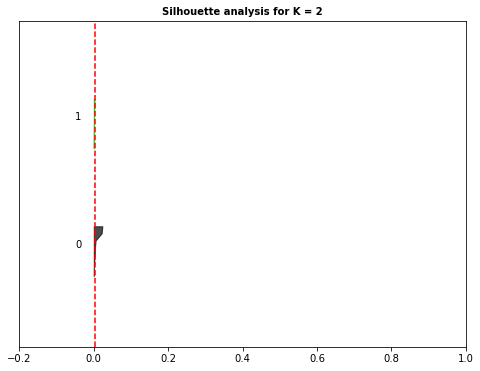

In [14]:
silhouette(kmeans_results, final_df, plot=True)

In [15]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

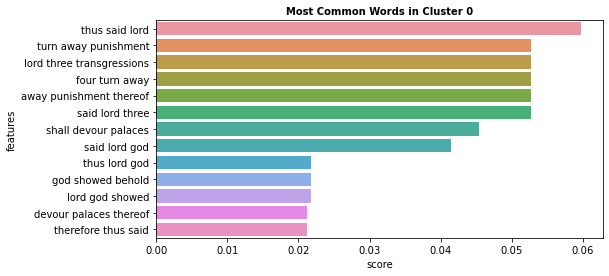

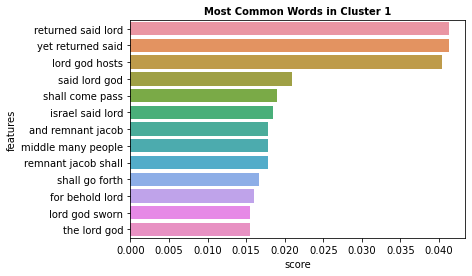

In [16]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [17]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

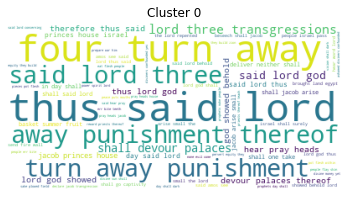

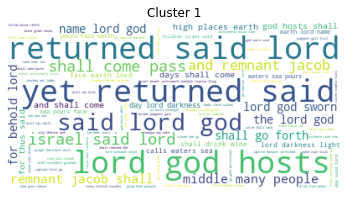

In [18]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [19]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Amos_1,"'words', 'amos', ',', 'among', 'herdsmen', 'te...",0
101,Amos_2,"'thus', 'said', 'lord', ';', 'three', 'transgr...",0
102,Amos_3,"'hear', 'word', 'lord', 'spoken', ',', 'childr...",0
103,Amos_4,"'hear', 'word', ',', 'cows', 'bashan', ',', 'm...",1
104,Amos_5,"'hear', 'word', 'take', ',', 'even', 'lamentat...",1


In [20]:
print(df)

          Autor                                              Livro  label
100      Amos_1  'words', 'amos', ',', 'among', 'herdsmen', 'te...      0
101      Amos_2  'thus', 'said', 'lord', ';', 'three', 'transgr...      0
102      Amos_3  'hear', 'word', 'lord', 'spoken', ',', 'childr...      0
103      Amos_4  'hear', 'word', ',', 'cows', 'bashan', ',', 'm...      1
104      Amos_5  'hear', 'word', 'take', ',', 'even', 'lamentat...      1
105      Amos_6  'woe', 'ease', 'zion', ',', 'trust', 'mountain...      1
106      Amos_7  'thus', 'lord', 'god', 'showed', ';', ',', 'be...      0
107      Amos_8  'thus', 'lord', 'god', 'showed', ':', 'behold'...      0
108      Amos_9  'saw', 'lord', 'standing', 'altar', ':', 'said...      1
109  Miqueias_1  'word', 'lord', 'came', 'micah', 'morasthite',...      1
110  Miqueias_2  'woe', 'devise', 'iniquity', ',', 'work', 'evi...      0
111  Miqueias_3  'said', ',', 'hear', ',', 'pray', ',', 'heads'...      0
112  Miqueias_4  'last', 'days', 'shal